# Hometask 

Mine top 10 association rules worth recommending for 
[Groceries dataset](https://www.kaggle.com/heeraldedhia/groceries-dataset)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Groceries_dataset.csv')
df.head ()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
len(df)

38765

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

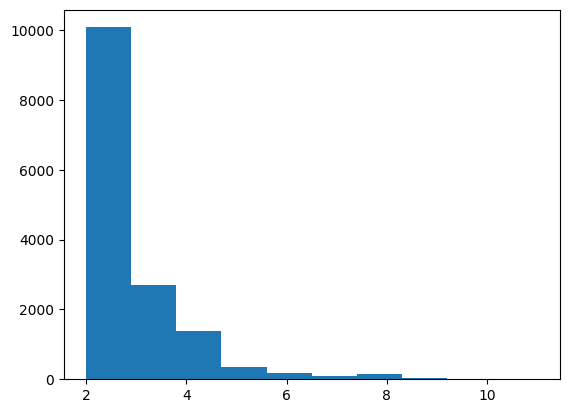

In [4]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

# Solution:
<hr/>

In [5]:
from apyori import apriori


transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).values.tolist()
len(transactions)

14963

In [6]:
df_t = pd.DataFrame(transactions)
df_t = df_t.fillna(0)
df_t

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,0,0,0,0,0,0,0
1,whole milk,pastry,salty snack,0,0,0,0,0,0,0,0
2,canned beer,misc. beverages,0,0,0,0,0,0,0,0,0
3,sausage,hygiene articles,0,0,0,0,0,0,0,0,0
4,soda,pickled vegetables,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14958,tropical fruit,berries,other vegetables,yogurt,kitchen towels,napkins,0,0,0,0,0
14959,bottled water,herbs,0,0,0,0,0,0,0,0,0
14960,fruit/vegetable juice,onions,0,0,0,0,0,0,0,0,0
14961,soda,root vegetables,semi-finished bread,0,0,0,0,0,0,0,0


In [7]:
trans = df_t.values.tolist()

trans_stripped = [[item for item in tr if item] for tr in trans]
trans_stripped[:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [8]:
rules = list(apriori(trans_stripped,
                     min_support=0.003,
                     min_confidence=0.02,
                     min_lift=1,
                     min_length=2))
len(rules)

46

In [9]:
rules[:5]

[RelationRecord(items=frozenset({'UHT-milk'}), support=0.021386085678005748, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'UHT-milk'}), confidence=0.021386085678005748, lift=1.0)]),
 RelationRecord(items=frozenset({'beef'}), support=0.03395041101383412, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beef'}), confidence=0.03395041101383412, lift=1.0)]),
 RelationRecord(items=frozenset({'berries'}), support=0.021787074784468355, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'berries'}), confidence=0.021787074784468355, lift=1.0)]),
 RelationRecord(items=frozenset({'bottled beer'}), support=0.04531176903027468, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bottled beer'}), confidence=0.04531176903027468, lift=1.0)]),
 RelationRecord(items=frozenset({'bottled water'}), support=0.06068301811134131, ordered_statistics=[OrderedStatistic(items_base=f

In [10]:
sorted_rules = sorted(rules, key=lambda rule: rule.ordered_statistics[0].lift, reverse=True)

sorted_rules[:10]

[RelationRecord(items=frozenset({'bottled beer', 'sausage'}), support=0.003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bottled beer'}), items_add=frozenset({'sausage'}), confidence=0.07374631268436578, lift=1.2220000849348451), OrderedStatistic(items_base=frozenset({'sausage'}), items_add=frozenset({'bottled beer'}), confidence=0.05537098560354374, lift=1.2220000849348451)]),
 RelationRecord(items=frozenset({'frankfurter', 'other vegetables'}), support=0.005146026866270133, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frankfurter'}), items_add=frozenset({'other vegetables'}), confidence=0.13628318584070798, lift=1.1161495948191098), OrderedStatistic(items_base=frozenset({'other vegetables'}), items_add=frozenset({'frankfurter'}), confidence=0.042145593869731796, lift=1.1161495948191096)]),
 RelationRecord(items=frozenset({'sausage', 'yogurt'}), support=0.005747510525964045, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sausa

## Printing Top <font color="lime">10</font> rules by <font color="lime"> lift </font>

In [11]:
def print_rules(rules):
    for rule in rules:
        print ('rule.items=', list(rule.items))
        print ('rule.support=',rule.support)

        for os in rule.ordered_statistics:
            print ('\titems_base=', list(os.items_base))
            print ('\tlifted_item =', list(os.items_add))
            print ('\tlift=', os.lift)
            print ('\tconfidence (i.e. cond prob {} if {})='.format(list(os.items_add), list(os.items_base)), os.confidence)
            print ('\n')
        
print_rules(sorted_rules[:10])   

rule.items= ['bottled beer', 'sausage']
rule.support= 0.003341575887188398
	items_base= ['bottled beer']
	lifted_item = ['sausage']
	lift= 1.2220000849348451
	confidence (i.e. cond prob ['sausage'] if ['bottled beer'])= 0.07374631268436578


	items_base= ['sausage']
	lifted_item = ['bottled beer']
	lift= 1.2220000849348451
	confidence (i.e. cond prob ['bottled beer'] if ['sausage'])= 0.05537098560354374


rule.items= ['frankfurter', 'other vegetables']
rule.support= 0.005146026866270133
	items_base= ['frankfurter']
	lifted_item = ['other vegetables']
	lift= 1.1161495948191098
	confidence (i.e. cond prob ['other vegetables'] if ['frankfurter'])= 0.13628318584070798


	items_base= ['other vegetables']
	lifted_item = ['frankfurter']
	lift= 1.1161495948191096
	confidence (i.e. cond prob ['frankfurter'] if ['other vegetables'])= 0.042145593869731796


rule.items= ['sausage', 'yogurt']
rule.support= 0.005747510525964045
	items_base= ['sausage']
	lifted_item = ['yogurt']
	lift= 1.108986473967